# Project Summary
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider. Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. CEO, Mr. Brain,decided to initiate a data science project , which analyses the current employee data and find the core underlying causes of this performance issues.He expects the findings of this project will help him to take right course of actions.The following insights are expected from this project.

- Department wise performances
- Top 3 Important Factors effecting employee performance
- A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
- Recommendations to improve the employee performance based on insights from analysis.

In [1]:
# Importing the necessary libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Data

In [2]:
data = pd.read_csv('project-1.csv')

In [3]:
data.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   
3                  4                           2  ...   
4                  4                           1  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   
3                            6                       12                     6   
4                            2                        2                     2   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  
3         No                  3  
4         No                  3  

[5 rows x 27 columns]

In [5]:
data.shape

(1200, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [7]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

# Data Summary

In [8]:
# Distribution of Categorical features
data.describe(include=['O'])

Gender EducationBackground MaritalStatus EmpDepartment  \
count    1200                1200          1200          1200   
unique      2                   6             3             6   
top      Male       Life Sciences       Married         Sales   
freq      725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [9]:
# Distribution of Numerical features
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

# Department Wise Analysis

In [10]:
dept = data.iloc[:,[4,26]].copy()
dept_per = dept.copy()

In [11]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [12]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

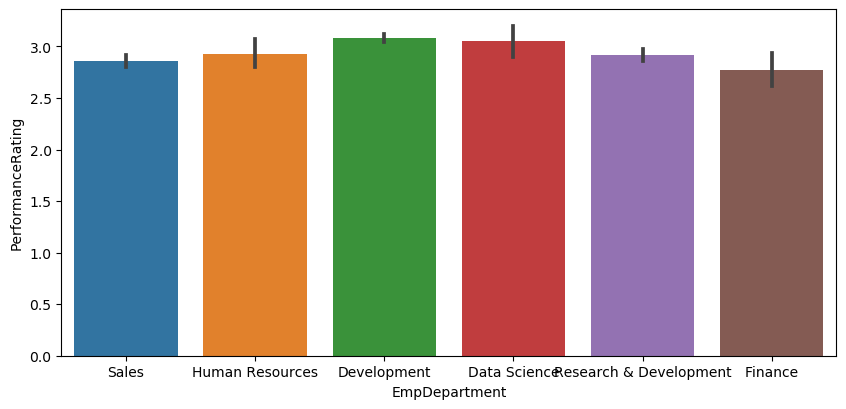

In [25]:
plt.figure(figsize=(10,4.5))
sns.barplot(data = dept_per, x='EmpDepartment', y ='PerformanceRating')

In [15]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

- In department wise performance, we have to analyze the data by each department present in the category. The data frame has to be separated or sliced according to department wise.

- In Employee department feature there are six departments available.


- Sales Development Research & Development Human Resources Finance Data Science

In [16]:
sales = data[data.EmpDepartment == 'Sales'] 
sales.head(1)

Age Gender EducationBackground MaritalStatus EmpDepartment  \
0   32   Male           Marketing        Single         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   

   Attrition  PerformanceRating  
0         No                  3  

[1 rows x 27 columns]

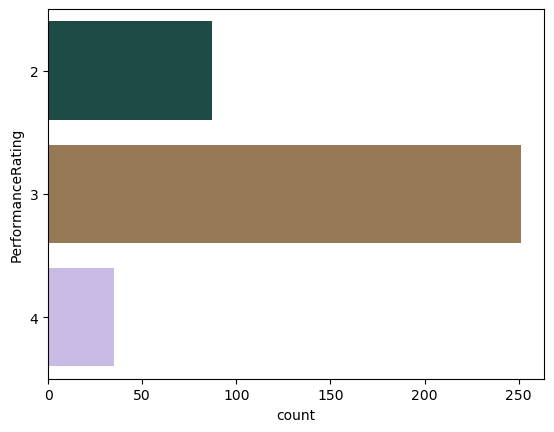

In [17]:
sns.countplot(y="PerformanceRating", data=sales, palette="cubehelix");

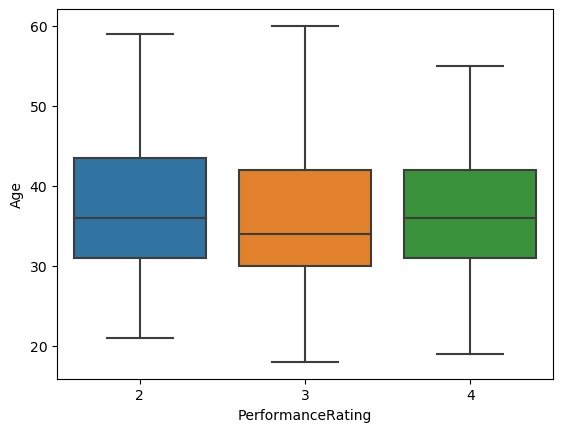

In [24]:
sns.boxplot(data = sales,x='PerformanceRating', y = 'Age')

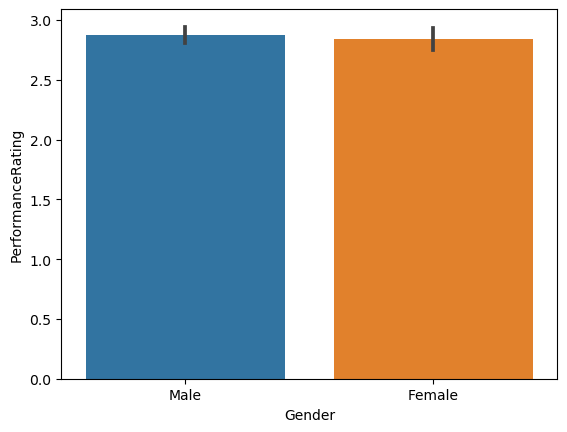

In [23]:
sns.barplot(data =sales, x= "Gender", y = "PerformanceRating")

In [28]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [29]:
data1 = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3d4c99'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#8f993d',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': sales['ExperienceYearsInCurrentRole'],
        'y': sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#3d9956',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Sales',
}
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig)

In [30]:
Development = data[data.EmpDepartment == 'Development'] 
Development.head()

Age  Gender EducationBackground MaritalStatus EmpDepartment EmpJobRole  \
5    27    Male       Life Sciences      Divorced   Development  Developer   
7    28  Female       Life Sciences        Single   Development  Developer   
8    36  Female       Life Sciences       Married   Development  Developer   
9    38  Female       Life Sciences        Single   Development  Developer   
10   44    Male             Medical        Single   Development  Developer   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
5        Travel_Frequently                10                  2   
7            Travel_Rarely                 1                  2   
8               Non-Travel                 8                  3   
9            Travel_Rarely                 1                  3   
10              Non-Travel                24                  3   

    EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
5                            4  ...                            3   
7                            1  ...                            4   
8                            1  ...                            1   
9                            3  ...                            4   
10                           1  ...                            3   

    TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
5                            9                      4                   2   
7                           10                      4                   3   
8                           10                      2                   3   
9                           10                      4                   4   
10                           9                      5                   3   

    ExperienceYearsAtThisCompany ExperienceYearsInCurrentRole  \
5                              9                            7   
7                              7                            7   
8                              8                            7   
9                              1                            0   
10                             5                            2   

    YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
5                         1                     7         No   
7                         3                     7        Yes   
8                         0                     5         No   
9                         0                     0         No   
10                        1                     4         No   

    PerformanceRating  
5                   4  
7                   3  
8                   3  
9                   3  
10                  3  

[5 rows x 27 columns]

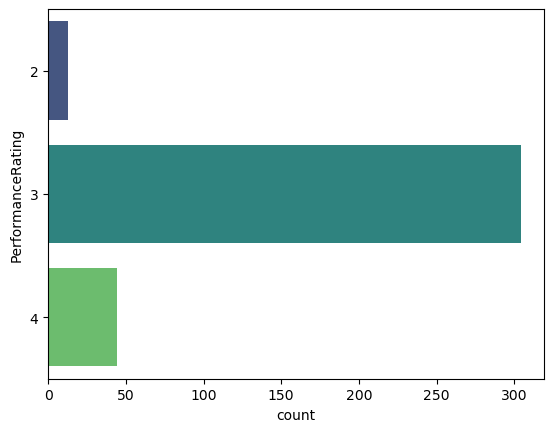

In [31]:
sns.countplot(y="PerformanceRating", data=Development, palette="viridis");

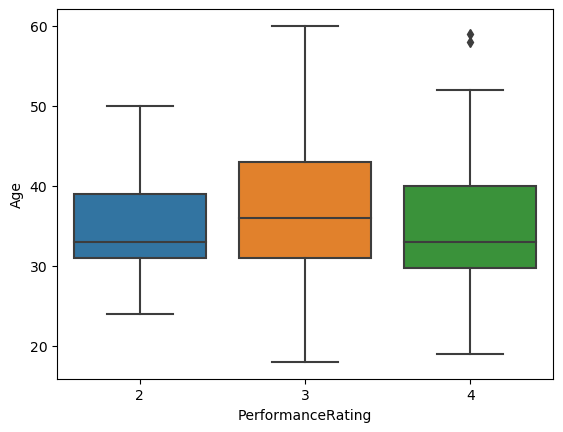

In [32]:
sns.boxplot(data = Development, x = 'PerformanceRating', y = 'Age')

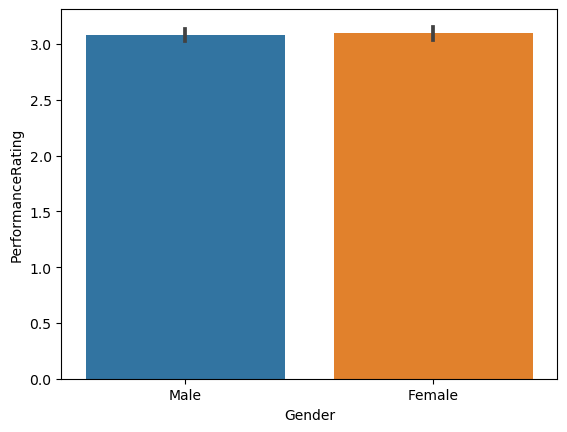

In [33]:
sns.barplot(data = Development, x = 'Gender',y = 'PerformanceRating')

In [34]:
data2 = [
    {
        'x': Development['TotalWorkExperienceInYears'],
        'y': Development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#16f704'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Development['ExperienceYearsAtThisCompany'],
        'y':Development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#0e7a06',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
     {
        'x': Development['ExperienceYearsInCurrentRole'],
        'y': Development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#083005',
        },
        'boxmean': False,
        'orientation': 'h',
         "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Development ',
}
fig = go.Figure(data=data2, layout=layout)

py.iplot(fig)

In [35]:
RD = data[data.EmpDepartment == 'Research & Development'] 
RD.head()

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
156   38    Male             Medical       Married  Research & Development   
157   35    Male               Other      Divorced  Research & Development   
158   31  Female       Life Sciences       Married  Research & Development   
159   18    Male       Life Sciences        Single  Research & Development   
160   54  Female    Technical Degree       Married  Research & Development   

                 EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
156      Senior Manager R&D       Travel_Frequently                10   
157   Laboratory Technician           Travel_Rarely                14   
158  Manufacturing Director       Travel_Frequently                 1   
159      Research Scientist              Non-Travel                 5   
160      Senior Manager R&D           Travel_Rarely                17   

     EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
156                  1                           3  ...   
157                  4                           3  ...   
158                  1                           3  ...   
159                  2                           2  ...   
160                  3                           3  ...   

     EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
156                            2                           3   
157                            4                           5   
158                            3                           4   
159                            4                           0   
160                            3                          22   

     TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
156                      0                   2                             2   
157                      2                   1                             4   
158                      1                   3                             4   
159                      2                   3                             0   
160                      2                   3                            10   

    ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
156                            1                        0   
157                            2                        0   
158                            3                        0   
159                            0                        0   
160                            7                        0   

     YearsWithCurrManager  Attrition  PerformanceRating  
156                     2         No                  3  
157                     2        Yes                  3  
158                     3         No                  3  
159                     0         No                  3  
160                     8         No                  3  

[5 rows x 27 columns]

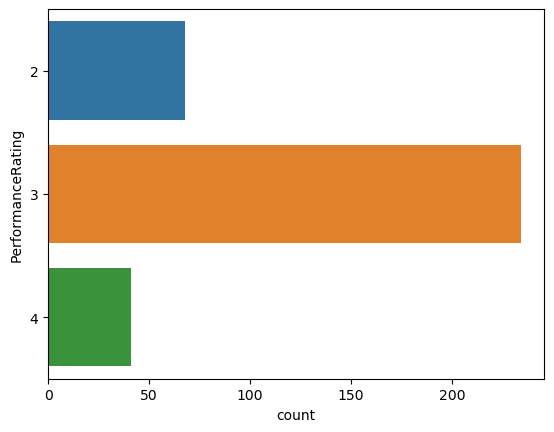

In [36]:
sns.countplot(y="PerformanceRating", data=RD, palette="tab10");

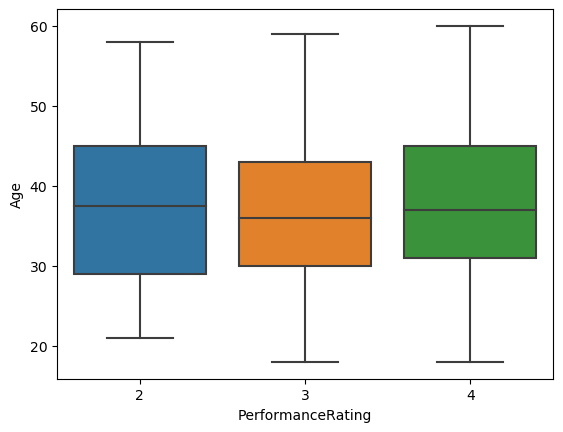

In [37]:
sns.boxplot(data = RD, x ='PerformanceRating', y = 'Age')

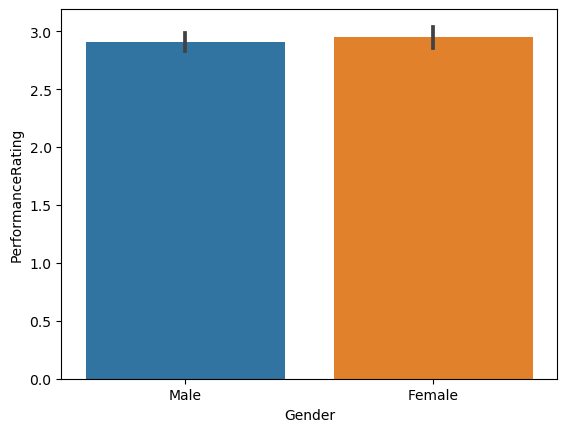

In [38]:
sns.barplot(data = RD, x = 'Gender',y = 'PerformanceRating')

In [39]:
data3 = [
    {
        'x': RD['TotalWorkExperienceInYears'],
        'y': RD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#a313ed'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':RD['ExperienceYearsAtThisCompany'],
        'y':RD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#5e466a',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
     {
        'x': RD['ExperienceYearsInCurrentRole'],
        'y': RD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#230533',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
          }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - R & D',
}
fig = go.Figure(data=data3, layout=layout)

py.iplot(fig)

In [40]:
HR = data[data.EmpDepartment == 'Human Resources'] 
HR.head()

Age  Gender EducationBackground MaritalStatus    EmpDepartment  \
3    41    Male     Human Resources      Divorced  Human Resources   
16   39  Female     Human Resources       Married  Human Resources   
58   36    Male     Human Resources       Married  Human Resources   
81   28    Male             Medical      Divorced  Human Resources   
85   36    Male       Life Sciences       Married  Human Resources   

         EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
3           Manager           Travel_Rarely                10   
16  Human Resources           Travel_Rarely                 3   
58  Human Resources           Travel_Rarely                13   
81  Human Resources           Travel_Rarely                 8   
85  Human Resources           Travel_Rarely                 8   

    EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
3                   4                           2  ...   
16                  3                           3  ...   
58                  3                           3  ...   
81                  2                           2  ...   
85                  3                           1  ...   

    EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
3                             2                          23   
16                            3                          12   
58                            2                           8   
81                            4                           6   
85                            3                           6   

    TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
3                       2                   2                            21   
16                      3                   1                             8   
58                      2                   3                             5   
81                      6                   3                             5   
85                      3                   3                             5   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
3                             6                       12   
16                            3                        3   
58                            2                        0   
81                            1                        0   
85                            4                        0   

    YearsWithCurrManager  Attrition  PerformanceRating  
3                      6         No                  3  
16                     6         No                  3  
58                     4         No                  3  
81                     4         No                  3  
85                     3         No                  3  

[5 rows x 27 columns]

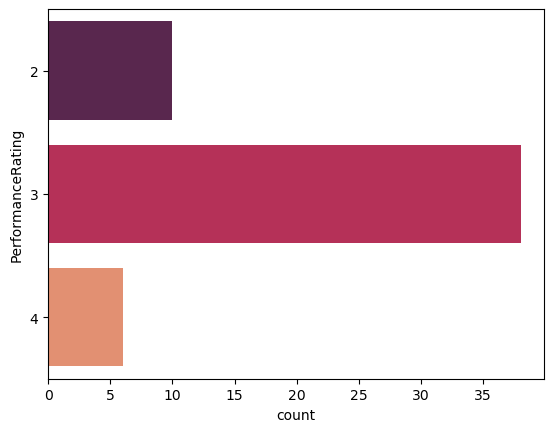

In [41]:
sns.countplot(y="PerformanceRating", data=HR, palette="rocket");

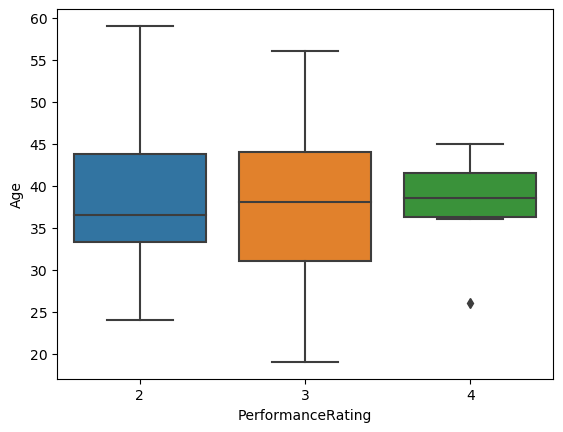

In [42]:
sns.boxplot(data = HR, x='PerformanceRating',y = 'Age')

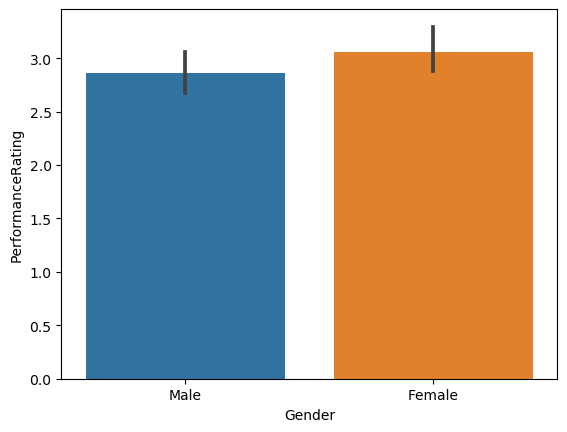

In [43]:
sns.barplot(data = HR, x= 'Gender',y = 'PerformanceRating')

In [44]:
data4 = [
    {
        'x': HR['TotalWorkExperienceInYears'],
        'y': HR['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#d6ed13'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':HR['ExperienceYearsAtThisCompany'],
        'y':HR['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#23ed13',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
     {
        'x': HR['ExperienceYearsInCurrentRole'],
        'y': HR['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#46b1ed',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
    ]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - HR ',
}
fig = go.Figure(data=data4, layout=layout)

py.iplot(fig)

In [45]:
Finance = data[data.EmpDepartment == 'Finance'] 
Finance.head()

Age Gender EducationBackground MaritalStatus EmpDepartment  \
482   29   Male       Life Sciences      Divorced       Finance   
484   23   Male    Technical Degree       Married       Finance   
485   35   Male       Life Sciences       Married       Finance   
486   34   Male    Technical Degree       Married       Finance   
487   43   Male    Technical Degree      Divorced       Finance   

          EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
482  Finance Manager       Travel_Frequently                 2   
484  Finance Manager           Travel_Rarely                10   
485  Finance Manager           Travel_Rarely                28   
486  Finance Manager       Travel_Frequently                10   
487  Finance Manager           Travel_Rarely                27   

     EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
482                  1                           1  ...   
484                  3                           4  ...   
485                  3                           2  ...   
486                  4                           4  ...   
487                  3                           4  ...   

     EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
482                            4                           6   
484                            4                           4   
485                            4                          10   
486                            2                           8   
487                            3                           8   

     TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
482                      0                   4                             6   
484                      2                   3                             2   
485                      3                   2                            10   
486                      3                   2                             8   
487                      0                   3                             6   

    ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
482                            4                        1   
484                            2                        2   
485                            9                        6   
486                            2                        7   
487                            4                        0   

     YearsWithCurrManager  Attrition  PerformanceRating  
482                     3         No                  2  
484                     2         No                  3  
485                     8         No                  2  
486                     7         No                  3  
487                     2         No                  3  

[5 rows x 27 columns]

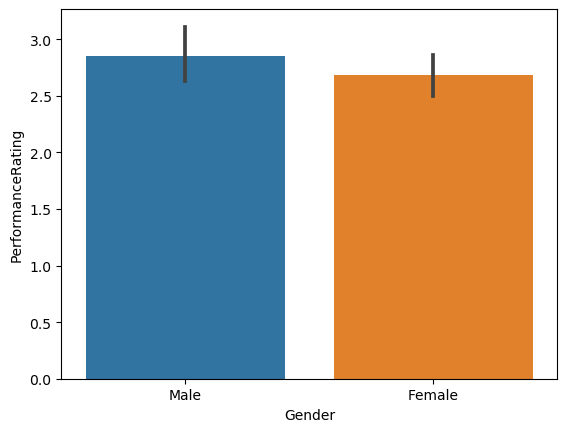

In [47]:
sns.barplot(data = Finance, x = 'Gender',y = 'PerformanceRating')

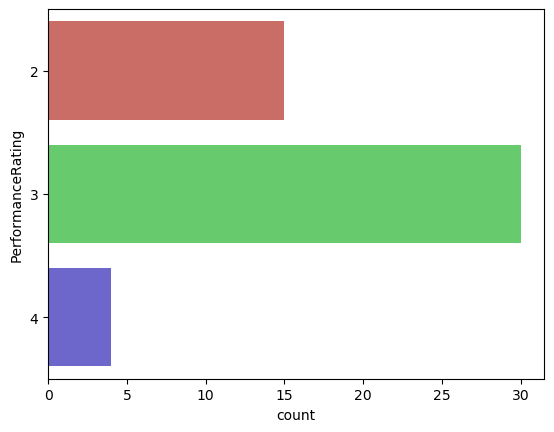

In [48]:
sns.countplot(y="PerformanceRating", data=Finance, palette="hls");

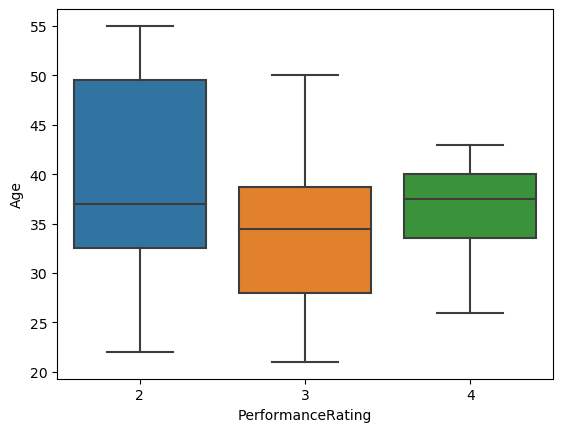

In [49]:
sns.boxplot(data = Finance, x = 'PerformanceRating',y = 'Age')

In [50]:
data5 = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3308f6'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#260ba0',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#160757',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Finance ',
}
fig = go.Figure(data=data5, layout=layout)

py.iplot(fig)

In [51]:
Data_Science = data[data.EmpDepartment == 'Data Science'] 
Data_Science.head()

Age  Gender EducationBackground MaritalStatus EmpDepartment  \
89    49  Female    Technical Degree       Married  Data Science   
107   21  Female               Other        Single  Data Science   
108   36    Male       Life Sciences       Married  Data Science   
120   48    Male             Medical       Married  Data Science   
942   51    Male       Life Sciences       Married  Data Science   

         EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
89   Data Scientist           Travel_Rarely                 1   
107  Data Scientist           Travel_Rarely                18   
108  Data Scientist           Travel_Rarely                14   
120  Data Scientist           Travel_Rarely                20   
942  Data Scientist           Travel_Rarely                 8   

     EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
89                   3                           3  ...   
107                  1                           4  ...   
108                  1                           3  ...   
120                  4                           4  ...   
942                  4                           2  ...   

     EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
89                             2                           7   
107                            1                           1   
108                            1                          17   
120                            1                          13   
942                            4                          16   

     TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
89                       2                   3                             4   
107                      3                   2                             1   
108                      2                   2                            16   
120                      2                   2                             0   
942                      5                   1                            10   

    ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
89                             2                        0   
107                            0                        0   
108                            8                        4   
120                            0                        0   
942                            9                        4   

     YearsWithCurrManager  Attrition  PerformanceRating  
89                      2         No                  3  
107                     0        Yes                  3  
108                    11         No                  3  
120                     0         No                  3  
942                     7         No                  3  

[5 rows x 27 columns]

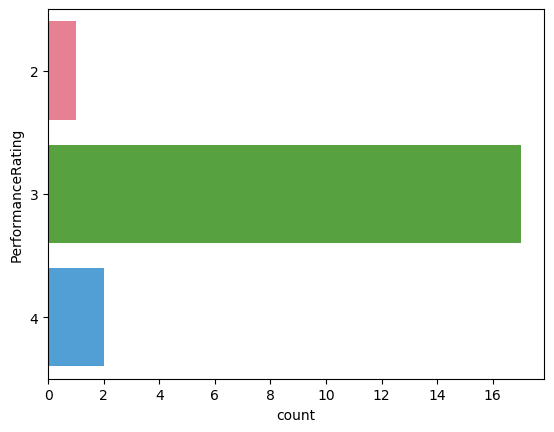

In [52]:
sns.countplot(y="PerformanceRating", data=Data_Science, palette="husl");

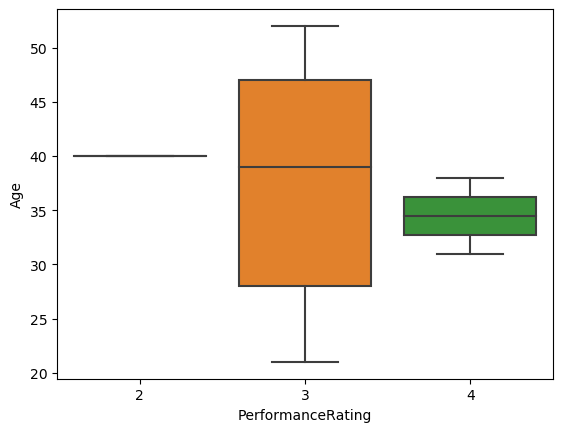

In [53]:
sns.boxplot(data = Data_Science, x='PerformanceRating',y = 'Age')

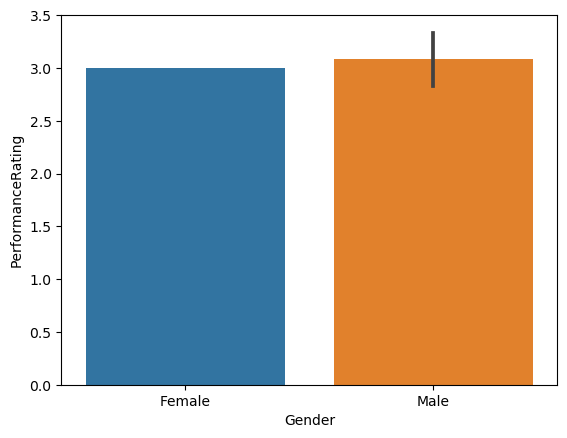

In [54]:
sns.barplot(data = Data_Science, x ='Gender',y = 'PerformanceRating')

In [55]:
data6 = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#074d75'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#85260b',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#5b0b85',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Data Science ',
}
fig = go.Figure(data=data6, layout=layout)

py.iplot(fig)

py.iplot(fig)

In [56]:
data.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   
3                  4                           2  ...   
4                  4                           1  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   
3                            6                       12                     6   
4                            2                        2                     2   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  
3         No                  3  
4         No                  3  

[5 rows x 27 columns]

In [57]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,25,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

Age Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32   Male                    2              2              5          13   
1   47   Male                    2              2              5          13   
2   40   Male                    1              1              5          13   
3   41   Male                    0              0              3           8   
4   60   Male                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                 9                  3   
1                        2                13                  4   
2                        1                 4                  4   
3                        2                 9                  4   
4                        2                15                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany ExperienceYearsInCurrentRole  \
0                            10                            7   
1                             7                            7   
2                            18                           13   
3                            21                            6   
4                             2                            2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                        0                     8          0                  1  
1                        1                     7          0                  1  
2                        1                    12          0                  2  
3                       12                     6          0                  1  
4                        2                     2          0                  1  

[5 rows x 27 columns]

In [58]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

Age  EducationBackground  MaritalStatus  \
Age                           1.000000            -0.055905      -0.098368   
EducationBackground          -0.055905             1.000000      -0.001097   
MaritalStatus                -0.098368            -0.001097       1.000000   
EmpDepartment                -0.000104            -0.026874       0.067272   
EmpJobRole                   -0.037665            -0.012325       0.038023   
BusinessTravelFrequency       0.040579             0.012382       0.028520   
DistanceFromHome              0.020937            -0.013919      -0.019148   
EmpEducationLevel             0.207313            -0.047978       0.026737   
EmpEnvironmentSatisfaction    0.013814             0.045028      -0.032467   
EmpHourlyRate                 0.062867            -0.030234      -0.013540   
EmpJobInvolvement             0.027216            -0.025505      -0.043355   
EmpJobLevel                   0.509139            -0.056338      -0.087359   
EmpJobSatisfaction           -0.002436            -0.030977       0.044593   
NumCompaniesWorked            0.284408            -0.032879      -0.030095   
EmpLastSalaryHikePercent     -0.006105            -0.009788       0.010128   
EmpRelationshipSatisfaction   0.049749             0.005652       0.026410   
TotalWorkExperienceInYears    0.680886            -0.027929      -0.093537   
TrainingTimesLastYear        -0.016053             0.051596       0.026045   
EmpWorkLifeBalance           -0.019563             0.022890       0.014154   
ExperienceYearsAtThisCompany  0.318852            -0.009887      -0.075728   
ExperienceYearsInCurrentRole  0.217163            -0.003215      -0.076663   
YearsSinceLastPromotion       0.228199             0.014277      -0.052951   
YearsWithCurrManager          0.205098             0.002767      -0.061908   
Attrition                    -0.189317             0.027161       0.162969   
PerformanceRating            -0.040164             0.005607       0.024172   

                              EmpDepartment  EmpJobRole  \
Age                               -0.000104   -0.037665   
EducationBackground               -0.026874   -0.012325   
MaritalStatus                      0.067272    0.038023   
EmpDepartment                      1.000000    0.568973   
EmpJobRole                         0.568973    1.000000   
BusinessTravelFrequency           -0.045233   -0.086251   
DistanceFromHome                   0.007707    0.022939   
EmpEducationLevel                  0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.019237    0.044612   
EmpHourlyRate                      0.003957   -0.016179   
EmpJobInvolvement                 -0.076988   -0.008034   
EmpJobLevel                        0.100526    0.004406   
EmpJobSatisfaction                 0.007150    0.032916   
NumCompaniesWorked                -0.033950   -0.009111   
EmpLastSalaryHikePercent          -0.012661    0.005735   
EmpRelationshipSatisfaction       -0.050286   -0.043067   
TotalWorkExperienceInYears         0.016065   -0.049529   
TrainingTimesLastYear              0.016438    0.004452   
EmpWorkLifeBalance                 0.068875   -0.007519   
ExperienceYearsAtThisCompany       0.047677   -0.009047   
ExperienceYearsInCurrentRole       0.069602    0.019383   
YearsSinceLastPromotion            0.052315    0.012190   
YearsWithCurrManager               0.033850   -0.004504   
Attrition                          0.048006    0.037508   
PerformanceRating                 -0.162615   -0.096209   

                              BusinessTravelFrequency  DistanceFromHome  \
Age                                          0.040579          0.020937   
EducationBackground                          0.012382         -0.013919   
MaritalStatus                                0.028520         -0.019148   
EmpDepartment                               -0.045233          0.007707   
EmpJobRole                                  -0.086251          0.022939   
BusinessTravelFrequen

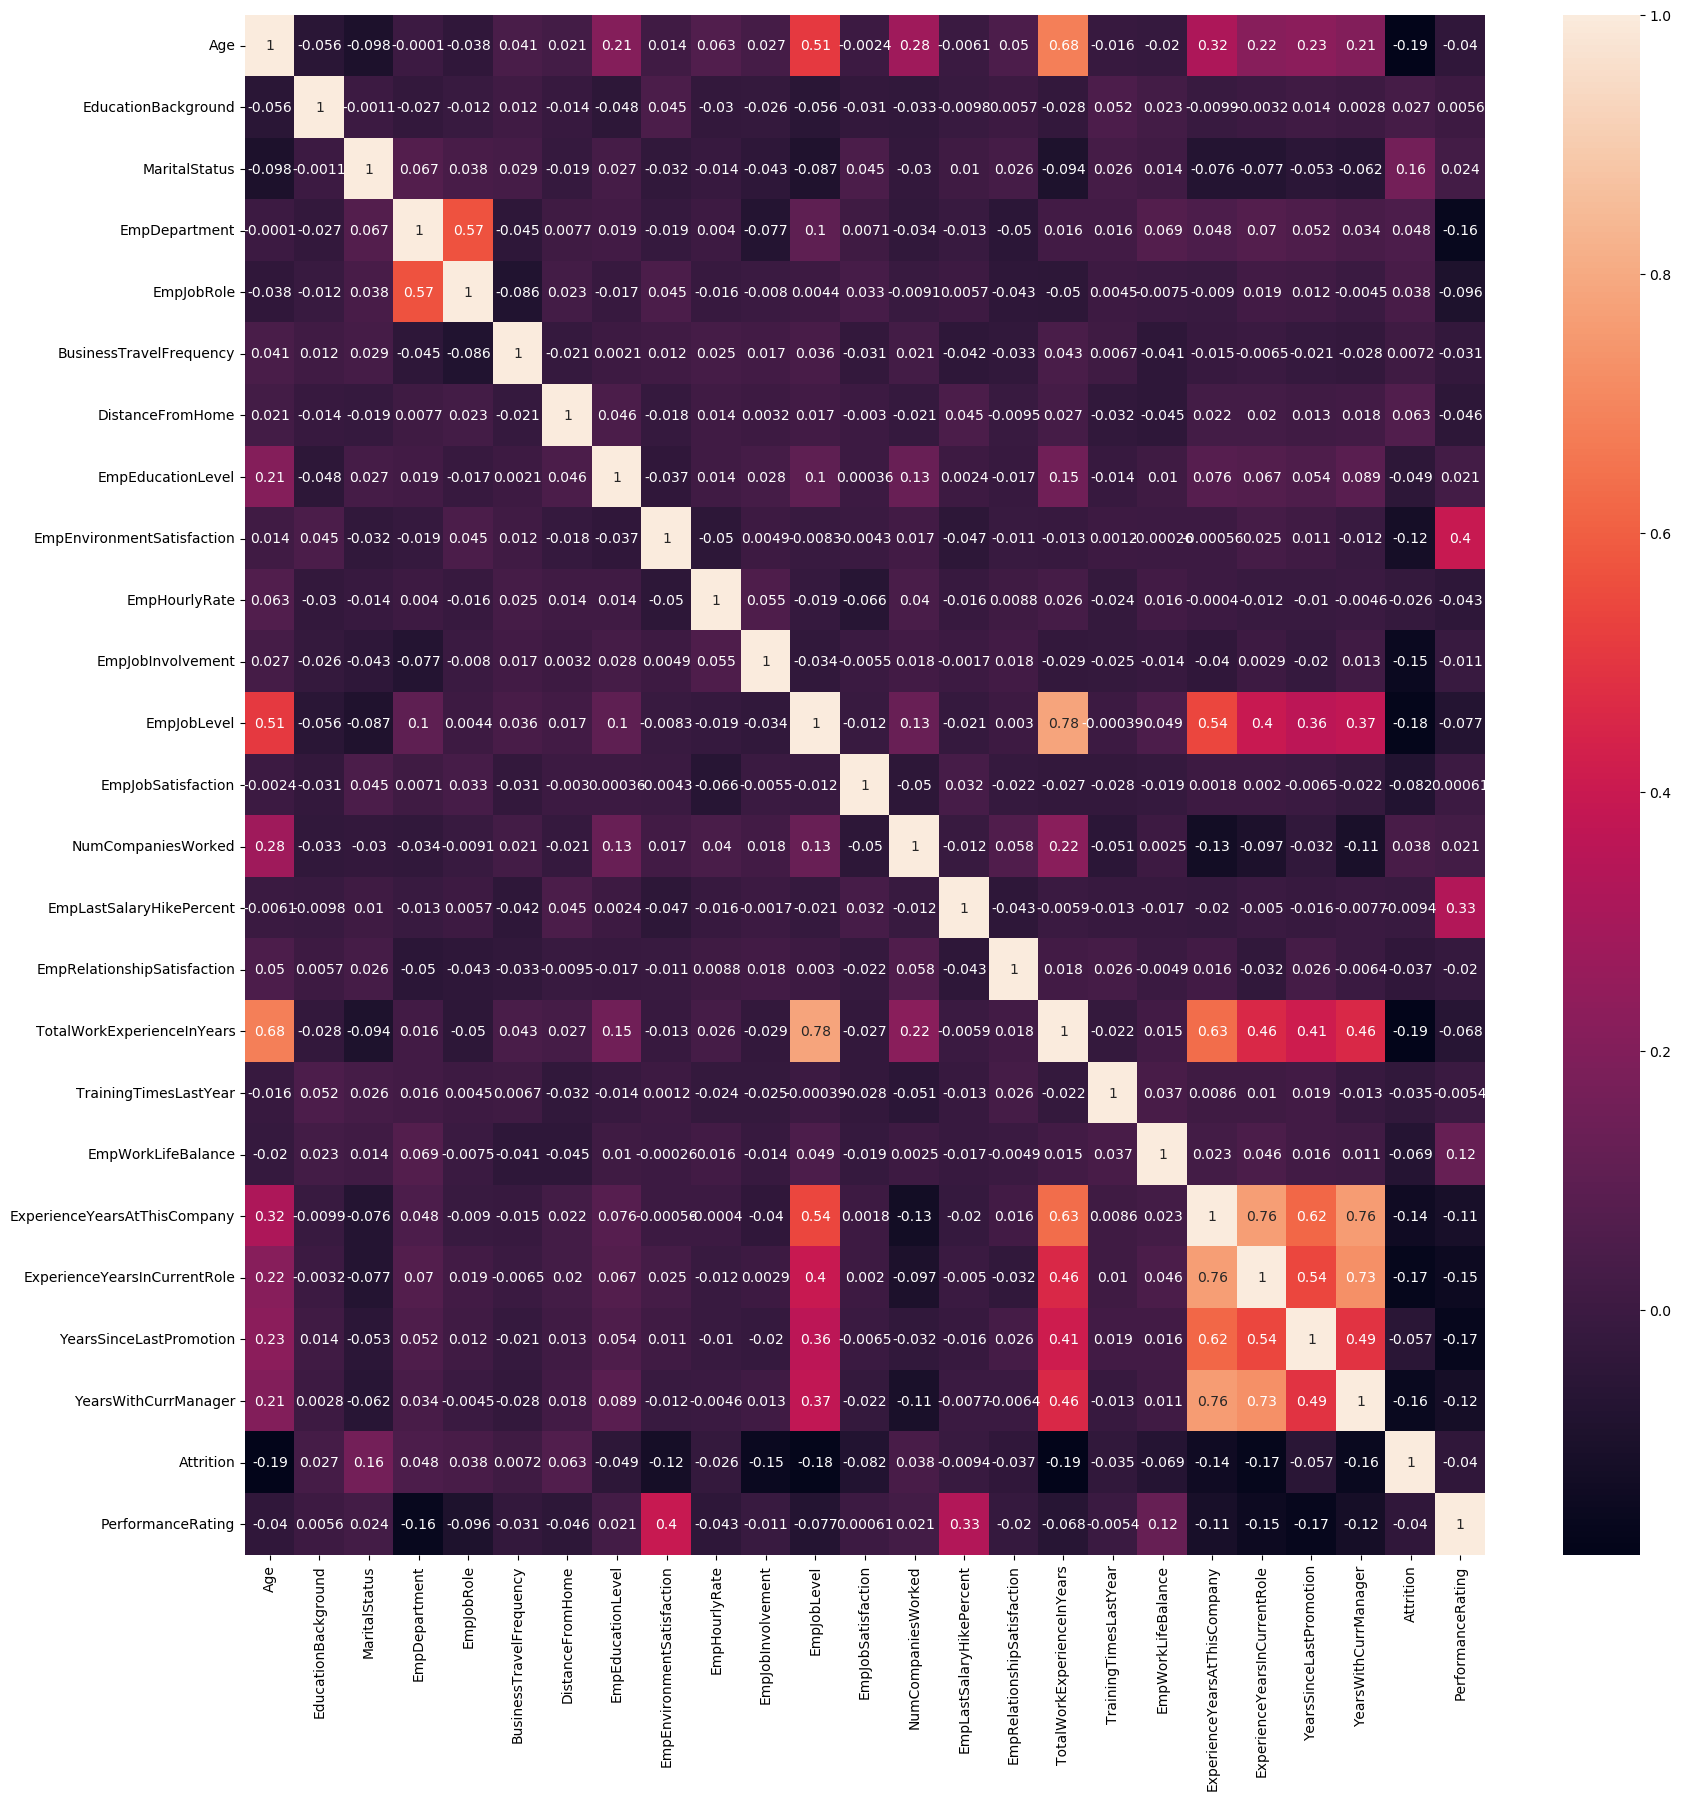

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

In [60]:
X = data.iloc[:,0:-1] 
X.head()

Age Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32   Male                    2              2              5          13   
1   47   Male                    2              2              5          13   
2   40   Male                    1              1              5          13   
3   41   Male                    0              0              3           8   
4   60   Male                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                 9                  3   
1                        2                13                  4   
2                        1                 4                  4   
3                        2                 9                  4   
4                        2                15                  4   

   EmpEnvironmentSatisfaction  ...  EmpLastSalaryHikePercent  \
0                           4  ...                         1   
1                           4  ...                         1   
2                           4  ...                        10   
3                           2  ...                         4   
4                           1  ...                         3   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance ExperienceYearsAtThisCompany  \
0                      2                   2                           10   
1                      2                   3                            7   
2                      2                   3                           18   
3                      2                   2                           21   
4                      1                   3                            2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  
0                     8          0  
1                     7          0  
2                    12          0  
3                     6          0  
4                     2          0  

[5 rows x 26 columns]

In [61]:
y = data.PerformanceRating

In [62]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: PerformanceRating, dtype: int64

In [63]:
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient higher

In [64]:
X.head()

EmpDepartment  EmpJobRole  EmpEnvironmentSatisfaction  \
0              5          13                           4   
1              5          13                           4   
2              5          13                           4   
3              3           8                           2   
4              5          13                           1   

   EmpLastSalaryHikePercent  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                         1                   2                            10   
1                         1                   3                             7   
2                        10                   3                            18   
3                         4                   2                            21   
4                         3                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                             7                        0                     8  
1                             7                        1                     7  
2                            13                        1                    12  
3                             6                       12                     6  
4                             2                        2                     2

In [65]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [67]:
scaled_data

array([[ 1.05234978,  0.83342636,  1.17797793, ...,  0.74976601,
        -0.68137224,  1.10025139],
       [ 1.05234978,  0.83342636,  1.17797793, ...,  0.74976601,
        -0.37083419,  0.8177735 ],
       [ 1.05234978,  0.83342636,  1.17797793, ...,  2.4107861 ,
        -0.37083419,  2.23016296],
       ...,
       [-1.30585701,  1.25426021,  1.17797793, ...,  1.02660269,
         0.25024191,  1.10025139],
       [-1.8954087 , -1.69157671,  1.17797793, ...,  0.74976601,
         1.49239412,  0.8177735 ],
       [ 1.05234978,  0.83342636, -1.57394974, ..., -0.63441739,
        -0.06029614, -1.15957175]])

In [68]:
X_train.shape

(900, 9)

In [69]:
X_test.shape

(300, 9)

In [70]:
#PCA was used, it resulted in decline of accuracy.
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.52482257, 0.20478171, 0.11254311, 0.05402081, 0.04144974,
       0.03146401, 0.01651655, 0.01012293, 0.00427856])

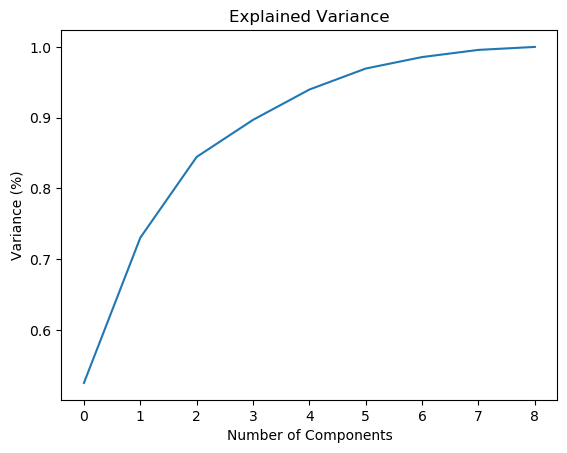

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [73]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.8233333333333334
RandomForsetClassifier
0.9
DecisionTreeClassifier
0.8633333333333333
KNeighborsClassifier
0.82
XGBClassifier
0.9033333333333333


The machine learning model has been fitted and predicted with the accuracy score. The goal of this project is nothing but the results from the analysis and machine learning model.

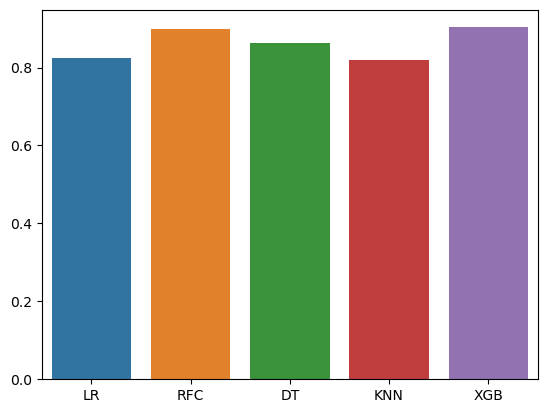

In [74]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.94      0.94      0.94       232
           2       0.79      0.74      0.77        31

    accuracy                           0.90       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.90      0.90      0.90       300



In [76]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, objective=binary:logistic, subsample=1.0;, score=0.943 total time=   0.8s
[CV 2/3] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, objective=binary:logistic, subsample=1.0;, score=0.963 total time=   0.8s
[CV 3/3] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, objective=binary:logistic, subsample=1.0;, score=0.907 total time=   0.7s
[CV 1/3] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, objective=binary:logistic, subsample=0.8;, score=0.938 total time=   0.7s
[CV 2/3] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, objective=binary:logistic, subsample=0.8;, score=0.960 total time=   0.7s
[CV 3/3] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, objective=binary:logistic, subsample=0.8;, score=0.900 total time=   0.7s
[CV 1/3] END colsample_bytre

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=

In [77]:
grid.best_score_

0.9375

In [78]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [79]:
y_pred= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7666666666666667
[[  0  37   0]
 [  1 230   1]
 [  0  31   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.77      0.99      0.87       232
           2       0.00      0.00      0.00        31

    accuracy                           0.77       300
   macro avg       0.26      0.33      0.29       300
weighted avg       0.60      0.77      0.67       300



In [80]:
predictions= y_pred

In [82]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [83]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [84]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.8866666666666667
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.92      0.95      0.93       232
           2       0.71      0.55      0.62        31

    accuracy                           0.89       300
   macro avg       0.80      0.76      0.78       300
weighted avg       0.88      0.89      0.88       300



In [85]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 29,   8,   0],
       [  5, 220,   7],
       [  3,  11,  17]], dtype=int64)

- The trained model is created using the machine learning algorithm as follows with the accuracy score,

- XGBClassifier: 90.3 % accuracy, RandomForsetClassifier: 90% accuracy

- The overall employee performance can be achieved by employee environment satisfaction. The company needs to focus more on the employee environment.